[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Apple stock price difference one week before and after launch dates'}, xlabel='Date'>

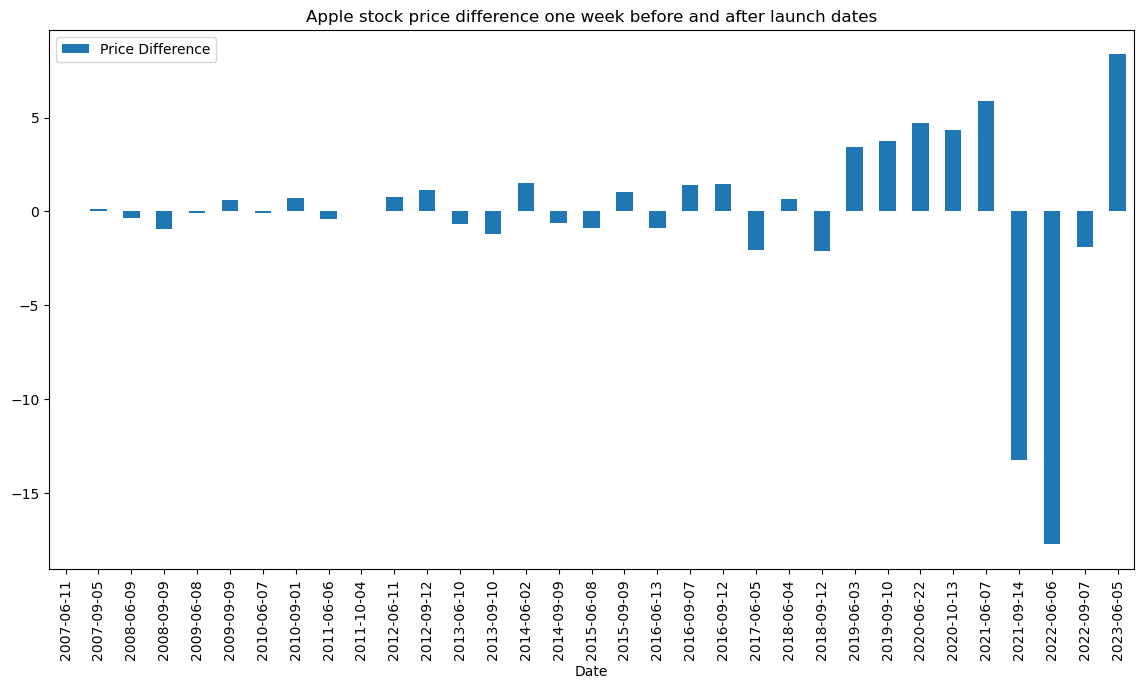

In [1]:
# Install libraries
import yfinance as yf
import pandas as pd

# Manually input biggest event dates
WWDC_dates = ["2007-06-11", "2008-06-09","2009-06-08","2010-06-07","2011-06-06","2012-06-11","2013-06-10","2014-06-02","2015-06-08","2016-06-13","2017-06-05","2018-06-04","2019-06-03","2020-06-22","2021-06-07","2022-06-06","2023-06-05"]
Fall_dates = ["2007-09-05","2008-09-09","2009-09-09","2010-09-01","2011-10-04","2012-09-12","2013-09-10","2014-09-09","2015-09-09","2016-09-07","2016-09-12","2018-09-12","2019-09-10","2020-10-13","2021-09-14","2022-09-07"]

# Combine the lists of dates
all_dates = WWDC_dates + Fall_dates
all_dates.sort()

# Download data
apple_stock = yf.download('AAPL', start=min(all_dates), end=max(all_dates))

# Initialize lists
prices_before = []
prices_after = []
event_dates = []

for date in all_dates:
    # Convert the date string to a pandas Timestamp
    date = pd.Timestamp(date)
    
    # Get the stock price for one week before the event
    price_before = apple_stock['Close'].asof(date - pd.Timedelta(days=7))
    
    # Get the stock price for one week after the event
    if date == pd.Timestamp("2023-06-05"):
        # Since yfinance hasn't update any data after 2023-06-05, we will manually update the close price on 2023-06-12
        # Manually input the close price
        price_after = 183.79
    else:
        price_after = apple_stock['Close'].asof(date + pd.Timedelta(days=7))
    
    # Add the prices and the date to the lists
    prices_before.append(price_before)
    prices_after.append(price_after)
    event_dates.append(date)

# DataFrame
price_df = pd.DataFrame({
    'Date': event_dates,
    'Price Before': prices_before,
    'Price After': prices_after,
})

# Price difference
price_df['Price Difference'] = price_df['Price After'] - price_df['Price Before']
# Convert 'Date' column to get rid of timestamp for a cleaner chart look
price_df['Date'] = price_df['Date'].dt.strftime('%Y-%m-%d')

# Bar Chart
price_df.plot.bar(x='Date', y='Price Difference', figsize=(14, 7), title="Apple stock price difference one week before and after launch dates")